### **Import Libraries**

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch import optim
import requests
from pathlib import Path

### **Import `helper_functions.py`**

In [189]:
if Path('helper_functions.py').is_file():
  print('"helper_functions.py" already exists.')
else:
  print('"helper_functions.py" is downloading ..')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

"helper_functions.py" already exists.


### **Create Dataset**

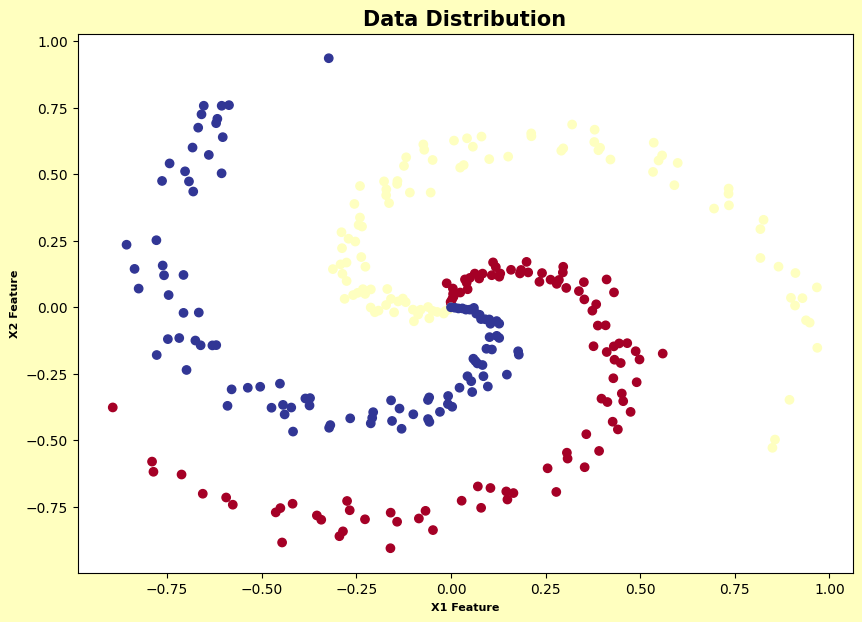

In [190]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.figure(figsize=(10,7), facecolor='#ffffbf')
plt.xlabel('X1 Feature', size=8, weight='bold', color='k')
plt.ylabel('X2 Feature', size=8, weight='bold', color='k')
plt.title('Data Distribution', size=15, weight='bold', color='k')
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdYlBu')
plt.show()

### **Turn Data Into Tensors**

In [191]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)
# Checking
type(X), type(y)

(torch.Tensor, torch.Tensor)

### **Check Input/Output Shape**

In [192]:
print(f'The Input Data Shape: {X.shape} | The Input Sample Shape: {X[0].shape}')
print(f'The Output Data Shape: {y.shape} | The Output Sample Shape: {y[0].shape}')

The Input Data Shape: torch.Size([300, 2]) | The Input Sample Shape: torch.Size([2])
The Output Data Shape: torch.Size([300]) | The Output Sample Shape: torch.Size([])


### **Split Data Into Train/Test Sets**

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)
# Checking
print(f'The Number of Training Data: {len(y_train)} ')
print(f'The Number of Test Data: {len(y_test)}')

The Number of Training Data: 240 
The Number of Test Data: 60


### **Visualize The Training/Test Sets**

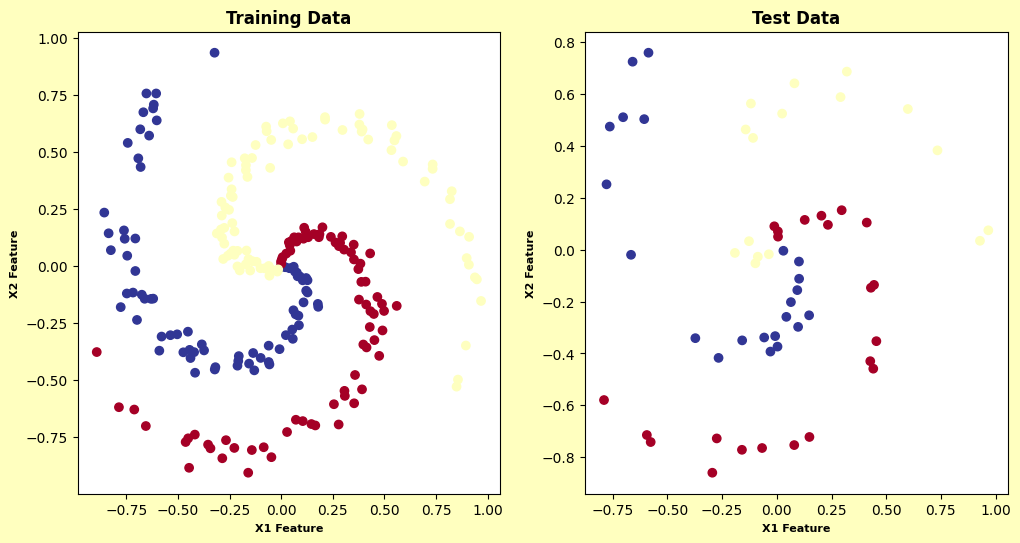

In [194]:
plt.figure(figsize=(12,6), facecolor='#ffffbf')
# Training Data
plt.subplot(1,2,1)
plt.xlabel('X1 Feature', size=8, color='k', weight='bold')
plt.ylabel('X2 Feature', size=8, color='k', weight='bold')
plt.title('Training Data', size=12, color='k', weight='bold')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu')
# Test Data
plt.subplot(1,2,2)
plt.xlabel('X1 Feature', size=8, color='k', weight='bold')
plt.ylabel('X2 Feature', size=8, color='k', weight='bold')
plt.title('Test Data', size=12, color='k', weight='bold')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu')
plt.show()

### **Make Device Agnostic Code**

In [195]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### **Put Datasets into Target Device**

In [196]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
# Cheking
X_train.device, y_train.device, X_test.device, y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

### **Model Architecturing**

In [197]:
class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.stacked_layer= nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.stacked_layer(x).to(device)

### **Make an Instance of Model**

In [198]:
model = SpiralModel(input_features=2,
                    output_features=3,
                    hidden_units=12)
model

SpiralModel(
  (stacked_layer): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=12, bias=True)
    (7): ReLU()
    (8): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [199]:
model.state_dict()

OrderedDict([('stacked_layer.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691]])),
             ('stacked_layer.0.bias',
              tensor([-0.5582, -0.3260, -0.1997, -0.4252,  0.0667, -0.6984,  0.6386, -0.6007,
                       0.5459,  0.1177, -0.2296,  0.4370])),
             ('stacked_layer.2.weight',
              tensor([[ 0.0450,  0.2332,  0.0316, -0.0910,  0.0776, -0.0783,  0.1215,  0.2577,
                        0.1669, -0.1262,  0.1666,  0.0517],
                      [ 0.1466, -0.1759, -0.2858, -0.1115, -0.221

### **Define `Loss Function`/`Optimizer`/`Accuracy Function`**

In [200]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(),
                       lr = 0.01)
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct/ len(y_pred) *100
  return acc

### **Training / Test Loops**



In [201]:
# Set Manual Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs
epochs = 200

# Count Values
epoch_count = []
loss_count = []
acc_count = []
test_loss_count = []
test_acc_count = []

# Loops
for epoch in range(epochs):
  # Training
  model.train()
  # Forward Pass
  y_logits = model(X_train).squeeze()
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_preds = torch.argmax(y_pred_probs, dim=1)
  # Calculate the loss
  loss = loss_function(y_logits, y_train)
  acc = accuracy_function(y_train,
                          y_preds)
  # Zero Grad
  optimizer.zero_grad()
  # Backward Pass
  loss.backward()
  # Optimizing Step by Step
  optimizer.step()

  # Test
  model.eval()
  # Forward Pass
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred_probs = torch.softmax(test_logits, dim=1)
    test_preds = torch.argmax(test_pred_probs, dim=1)
  #Calcualte the loss
  test_loss = loss_function(test_logits, y_test)
  test_acc = accuracy_function(y_true = y_test,
                               y_pred = test_preds)

  # What is happening?!
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_count.append(loss.detach().numpy())
    acc_count.append(acc)
    test_loss_count.append(test_loss.detach().numpy())
    test_acc_count.append(test_acc)

    print(f'Loss: {loss}, acc: {acc} | Test Loss: {test_loss}, Test Acc: {test_acc}')

Loss: 1.1048972606658936, acc: 32.5 | Test Loss: 1.1089810132980347, Test Acc: 36.666666666666664
Loss: 1.0728245973587036, acc: 46.666666666666664 | Test Loss: 1.079772710800171, Test Acc: 45.0
Loss: 0.9392122626304626, acc: 62.5 | Test Loss: 0.9423259496688843, Test Acc: 55.00000000000001
Loss: 0.7333346009254456, acc: 65.83333333333333 | Test Loss: 0.733027458190918, Test Acc: 55.00000000000001
Loss: 0.5615102052688599, acc: 72.08333333333333 | Test Loss: 0.6021297574043274, Test Acc: 61.66666666666667
Loss: 0.3831280767917633, acc: 82.91666666666667 | Test Loss: 0.446647584438324, Test Acc: 78.33333333333333
Loss: 0.24962705373764038, acc: 93.75 | Test Loss: 0.2999400794506073, Test Acc: 88.33333333333333
Loss: 0.12264532595872879, acc: 97.08333333333333 | Test Loss: 0.11488939076662064, Test Acc: 96.66666666666667
Loss: 0.07242467999458313, acc: 97.08333333333333 | Test Loss: 0.0746830403804779, Test Acc: 96.66666666666667
Loss: 0.05549938231706619, acc: 97.91666666666666 | Test L

### **Visualize the Error and Accuracy Changes**

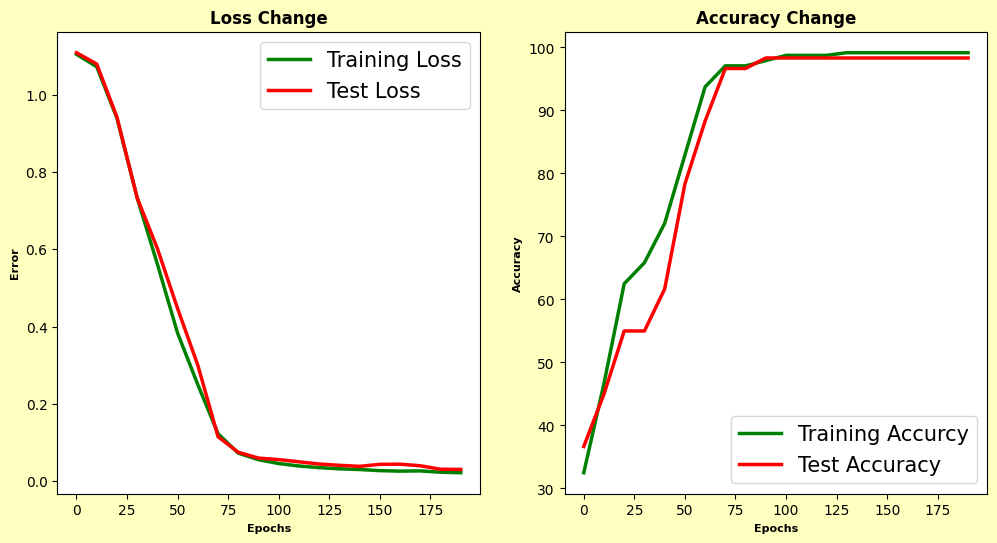

In [202]:
# Loss Function Change
plt.figure(figsize=(12,6), facecolor='#ffffbf')
plt.subplot(1,2,1)
plt.xlabel('Epochs', size=8, color='k', weight='bold')
plt.ylabel('Error', size=8, color='k', weight='bold')
plt.title('Loss Change', size = 12, color='k', weight='bold')
plt.plot(epoch_count, loss_count, color='g', linewidth=2.5, label='Training Loss')
plt.plot(epoch_count, test_loss_count, color='r', linewidth=2.5, label='Test Loss')
plt.legend(prop={'size':15})
# Accuracy Change
plt.subplot(1,2,2)
plt.xlabel('Epochs', size=8, color='k', weight='bold')
plt.ylabel('Accuracy', size=8, color='k', weight='bold')
plt.title('Accuracy Change', size = 12, color='k', weight='bold')
plt.plot(epoch_count, acc_count, color='g', linewidth=2.5, label='Training Accurcy')
plt.plot(epoch_count, test_acc_count, color='r', linewidth=2.5, label='Test Accuracy')
plt.legend(prop={'size':15})
plt.show()

### **Parameters of Trained Model**

In [203]:
model.state_dict()

OrderedDict([('stacked_layer.0.weight',
              tensor([[ 1.4492,  0.4335],
                      [ 0.5125,  0.7608],
                      [-1.1513,  0.2817],
                      [-0.9583,  1.0563],
                      [ 1.8980, -0.0535],
                      [ 0.6146,  0.1323],
                      [ 1.4488,  0.5655],
                      [ 0.3410, -0.0998],
                      [ 1.2155,  0.4991],
                      [-1.3012,  0.3507],
                      [-1.0524, -1.1849],
                      [-0.6439,  0.7051]])),
             ('stacked_layer.0.bias',
              tensor([-0.0207, -0.2633, -0.0445, -0.2970,  0.0710, -0.6984,  0.1383, -0.6007,
                       0.5320,  0.3269, -0.1567,  0.1055])),
             ('stacked_layer.2.weight',
              tensor([[ 0.9640,  0.1665, -0.7199, -0.7828, -0.2458, -0.0783,  0.4908,  0.2577,
                        0.4340,  0.4053, -0.3991,  0.4339],
                      [ 1.3611, -0.1776, -0.9871, -0.6618, -0.001

### **Make New Prediction With Trined Model**

In [204]:
model.eval()
with torch.inference_mode():
  new_logits = model(X_test).squeeze()
  new_pred_probs = torch.softmax(new_logits, dim=1)
  new_preds = torch.argmax(new_pred_probs, dim=1)
new_loss = loss_function(new_logits, y_test)
new_acc = accuracy_function(y_true=y_test,
                            y_pred = new_preds)
print(f'The Loss Value of New Prediction: {new_loss}')
print(f'The Accuracy Value of New Prediction: {new_acc}')

The Loss Value of New Prediction: 0.022255415096879005
The Accuracy Value of New Prediction: 98.33333333333333


In [205]:
new_preds[:10], y_test[:10]

(tensor([2, 2, 1, 1, 2, 2, 1, 1, 0, 1]),
 tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1]))

### **Visualize Decision Boundaries**


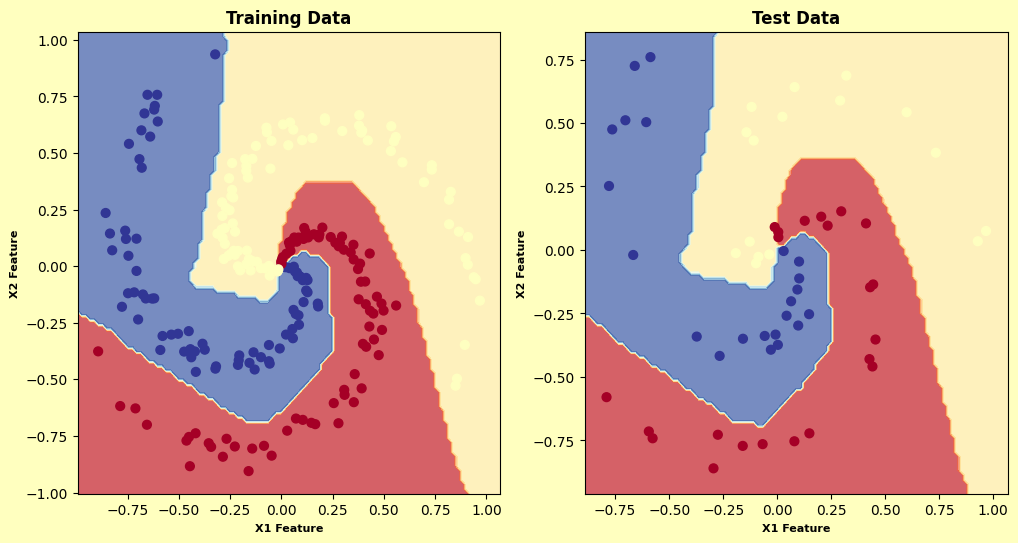

In [209]:
plt.figure(figsize = (12,6), facecolor='#ffffbf')
# Training Data
plt.subplot(1,2,1)
plt.xlabel('X1 Feature', color='k', size=8, weight='bold')
plt.ylabel('X2 Feature', color='k', size=8, weight='bold')
plt.title('Training Data', color='k', size=12, weight='bold')
plot_decision_boundary(model, X_train, y_train)
# Test Data
plt.subplot(1,2,2)
plt.xlabel('X1 Feature', color='k', size=8, weight='bold')
plt.ylabel('X2 Feature', color='k', size=8, weight='bold')
plt.title('Test Data', color='k', size=12, weight='bold')
plot_decision_boundary(model, X_test, y_test)
# Show
plt.show()

### **Save Model**

In [210]:
# Model Path File
model_path = Path('Models')
model_path.mkdir(parents=True, exist_ok=True)
# Model Name
model_name = '04_Classification.pth'
# Save Path
model_save_path = model_path / model_name
# Save
torch.save(obj=model.state_dict(),
           f=model_save_path)
print(f'The model is saving to: {model_save_path}')

The model is saving to: Models/04_Classification.pth


### **Load Model**

In [211]:
loaded_model = SpiralModel(input_features=2,
                           output_features=3,
                           hidden_units=12)
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model

<ipython-input-211-eccc652bdf5f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


SpiralModel(
  (stacked_layer): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=12, bias=True)
    (7): ReLU()
    (8): Linear(in_features=12, out_features=3, bias=True)
  )
)

### **Make Predictions With Loaded Model**

In [212]:
loaded_model.eval()
with torch.inference_mode():
  loaded_logits= loaded_model(X_test).squeeze()
  loaded_pred_probs = torch.softmax(loaded_logits, dim=1)
  loaded_preds = torch.argmax(loaded_pred_probs, dim=1)
loaded_loss = loss_function(loaded_logits, y_test)
loaded_acc = accuracy_function(y_true=y_test,
                               y_pred= loaded_preds)
print(f'The loss value: {loaded_loss}')
print(f'The accuracy value: {loaded_acc}')

The loss value: 0.022255415096879005
The accuracy value: 98.33333333333333


In [213]:
loaded_preds[-10:], y_test[-10:]

(tensor([1, 1, 2, 0, 2, 2, 0, 0, 1, 0]),
 tensor([1, 1, 2, 0, 2, 2, 0, 0, 1, 0]))